In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [5]:
dfp = pd.read_csv('pitcher_resample.csv').drop(columns = 'Unnamed: 0')

In [9]:
traditional = ['W', 'IP', 'SO', 'H', 'HR', 'ERA', 'L']
sabr = ['K/9', 'ERA-', 'FIP-', 'BB/9', 'LOB%', 'WHIP', 'WAR']

In [26]:
dfp['LOB%'] = dfp['LOB%'].str[:-1].astype(float)/100

In [30]:
X_t = dfp[traditional]
X_s = dfp[sabr]
y = dfp.CYA

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, stratify = y)

ss = StandardScaler()

In [13]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/brianschor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [14]:
model = Sequential()

model.add(Dense(14, activation='relu',
               input_shape = (X_train.shape[1],)))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
history = model.fit(X_train_sc, y_train, epochs = 10, batch_size = 150, validation_data=(X_test_sc, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1350 samples, validate on 450 samples
Epoch 1/10
1350/1350 [==============================] - 1s 439us/step - loss: 0.7084 - acc: 0.4807 - val_loss: 0.6747 - val_acc: 0.5556
Epoch 2/10
1350/1350 [==============================] - 0s 31us/step - loss: 0.6494 - acc: 0.6311 - val_loss: 0.6193 - val_acc: 0.6822
Epoch 3/10
1350/1350 [==============================] - 0s 20us/step - loss: 0.5960 - acc: 0.7348 - val_loss: 0.5685 - val_acc: 0.7756
Epoch 4/10
1350/1350 [==============================] - 0s 22us/step - loss: 0.5479 - acc: 0.7985 - val_loss: 0.5209 - val_acc: 0.8444
Epoch 5/10
1350/1350 [==============================] - 0s 19us/step - loss: 0.5023 - acc: 0.8526 - val_loss: 0.4759 - val_acc: 0.8867
Epoch 6/10
1350/1350 [==============================] - 0s 22us/step - loss: 0.4595 - acc: 0.8756 - val_loss: 0.4330 - val_acc: 0.9156
Epoch 7/10
1350/1350 [==============================] - 0s 20us/step - loss: 0.4197 - acc: 0.9

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

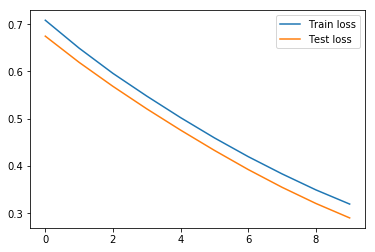

In [19]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

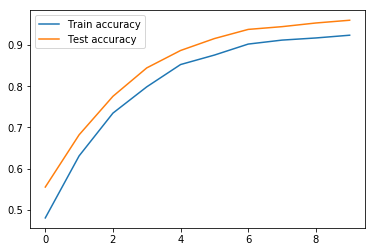

In [20]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, stratify = y)

ss = StandardScaler()

In [32]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/brianschor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [33]:
model = Sequential()

model.add(Dense(14, activation='relu',
               input_shape = (X_train.shape[1],)))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [35]:
history = model.fit(X_train_sc, y_train, epochs = 10, batch_size = 150, validation_data=(X_test_sc, y_test))

Train on 1350 samples, validate on 450 samples
Epoch 1/10
1350/1350 [==============================] - 0s 367us/step - loss: 0.9477 - acc: 0.1696 - val_loss: 0.9123 - val_acc: 0.1689
Epoch 2/10
1350/1350 [==============================] - 0s 19us/step - loss: 0.8507 - acc: 0.1904 - val_loss: 0.8219 - val_acc: 0.2044
Epoch 3/10
1350/1350 [==============================] - 0s 24us/step - loss: 0.7707 - acc: 0.2667 - val_loss: 0.7472 - val_acc: 0.3289
Epoch 4/10
1350/1350 [==============================] - 0s 31us/step - loss: 0.7040 - acc: 0.4556 - val_loss: 0.6853 - val_acc: 0.5422
Epoch 5/10
1350/1350 [==============================] - 0s 22us/step - loss: 0.6489 - acc: 0.6726 - val_loss: 0.6336 - val_acc: 0.7178
Epoch 6/10
1350/1350 [==============================] - 0s 23us/step - loss: 0.6027 - acc: 0.7800 - val_loss: 0.5896 - val_acc: 0.8044
Epoch 7/10
1350/1350 [==============================] - 0s 17us/step - loss: 0.5622 - acc: 0.8489 - val_loss: 0.5514 - val_acc: 0.8556
Epoch 8

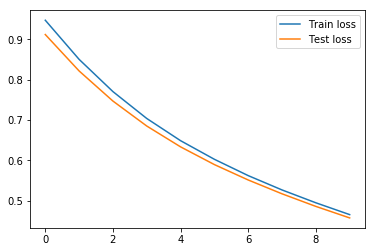

In [36]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

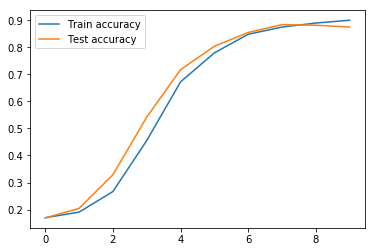

In [37]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();